# 자동차 연비 예측

## 데이터 수집

In [551]:
import numpy as np
import pandas as pd 

data_df = pd.read_csv('auto-mpg.csv', header=0, engine='python')

In [552]:
data_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


## 데이터 준비 및 탐색

In [553]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [554]:
data_df.shape

(398, 9)

In [555]:
data_df[data_df['horsepower']=='?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [556]:
data_df.drop(data_df[data_df['horsepower']=='?'].index, axis=0, inplace=True)

In [557]:
data_df.shape

(392, 9)

In [558]:
data_df['horsepower'] = data_df['horsepower'].astype(int)

In [559]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car_name      392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 30.6+ KB


In [560]:
data_df['cylinders_scaled'] = data_df['cylinders'] / 100
data_df['displacement_scaled'] = data_df['displacement'] / 100
data_df['weight_scaled'] = data_df['weight'] / 100
data_df['acceleration_scaled'] = data_df['acceleration'] / 10
data_df['model_year_scaled'] = data_df['model_year']
data_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,cylinders_scaled,displacement_scaled,weight_scaled,acceleration_scaled,model_year_scaled
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0.08,3.07,35.04,1.20,70
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0.08,3.50,36.93,1.15,70
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0.08,3.18,34.36,1.10,70
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0.08,3.04,34.33,1.20,70
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0.08,3.02,34.49,1.05,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl,0.04,1.40,27.90,1.56,82
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup,0.04,0.97,21.30,2.46,82
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage,0.04,1.35,22.95,1.16,82
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger,0.04,1.20,26.25,1.86,82


## 분석 모델 구축

In [561]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [562]:
X = data_df[['cylinders_scaled','displacement_scaled', 'weight_scaled', 'acceleration_scaled', 'model_year_scaled']]
# X = data_df[['cylinders', 'displacement', 'weight', 'acceleration', 'model_year']]
Y = data_df['mpg']

In [563]:
X

,cylinders_scaled,displacement_scaled,weight_scaled,acceleration_scaled,model_year_scaled
0,0.08,3.07,35.04,1.20,70
1,0.08,3.50,36.93,1.15,70
2,0.08,3.18,34.36,1.10,70
3,0.08,3.04,34.33,1.20,70
4,0.08,3.02,34.49,1.05,70
...,...,...,...,...,...
393,0.04,1.40,27.90,1.56,82
394,0.04,0.97,21.30,2.46,82
395,0.04,1.35,22.95,1.16,82
396,0.04,1.20,26.25,1.86,82


In [564]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   cylinders_scaled     392 non-null    float64
 1   displacement_scaled  392 non-null    float64
 2   weight_scaled        392 non-null    float64
 3   acceleration_scaled  392 non-null    float64
 4   model_year_scaled    392 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 18.4 KB


In [565]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=156)

In [566]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(274, 5) (118, 5) (274,) (118,)


In [567]:
lr = LinearRegression()

In [568]:
lr.fit(X_train, Y_train)

LinearRegression()

In [569]:
Y_predict = lr.predict(X_test)

In [570]:
Y_predict[:5], Y_test.head()

(array([ 7.34463952, 19.45357676, 23.16470248, 29.4931023 , 22.78566284]),
 28      9.0
 13     14.0
 194    22.5
 358    31.6
 127    19.0
 Name: mpg, dtype: float64)

## 결과 분석

In [571]:
# train data predict

In [572]:
X_predict = lr.predict(X_train)

In [573]:
mse_train = mean_squared_error(Y_train, X_predict)
mse_train

10.254559476875695

In [574]:
rmse_train = np.sqrt(mse_train)
rmse_train

3.2022741102028873

In [575]:
r2_train = r2_score(Y_train, X_predict)
r2_train

0.8211468060504387

In [576]:
lr.intercept_

-16.7155117588898

In [577]:
lr.coef_

array([-1.44335665,  0.75591614, -0.71617725,  0.96561603,  0.77115361])

In [578]:
np.round(lr.coef_, 3)

array([-1.443,  0.756, -0.716,  0.966,  0.771])

In [579]:
# test data predict

In [580]:
mse_test = mean_squared_error(Y_test, Y_predict)
mse_test # mean squared error

14.927069310837519

In [581]:
rmse_test = np.sqrt(mse_test)
rmse_test # root mean squared error

3.8635565623965595

In [582]:
r2_test = r2_score(Y_test, Y_predict) # r2 variance score
r2_test

0.7820050879225463

In [583]:
lr.intercept_ # 절편

-16.7155117588898

In [584]:
lr.coef_ # 회귀계수

array([-1.44335665,  0.75591614, -0.71617725,  0.96561603,  0.77115361])

In [585]:
np.round(lr.coef_, 3)

array([-1.443,  0.756, -0.716,  0.966,  0.771])

## 시각화

In [586]:
import matplotlib.pyplot as plt
import seaborn as sns

In [587]:
X.columns

Index(['cylinders_scaled', 'displacement_scaled', 'weight_scaled',
       'acceleration_scaled', 'model_year_scaled'],
      dtype='object')

<BarContainer object of 5 artists>

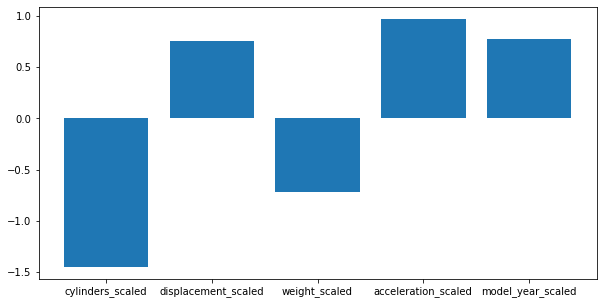

In [588]:
plt.figure(figsize=(10,5))
plt.bar(x=list(X.columns), height=lr.coef_)

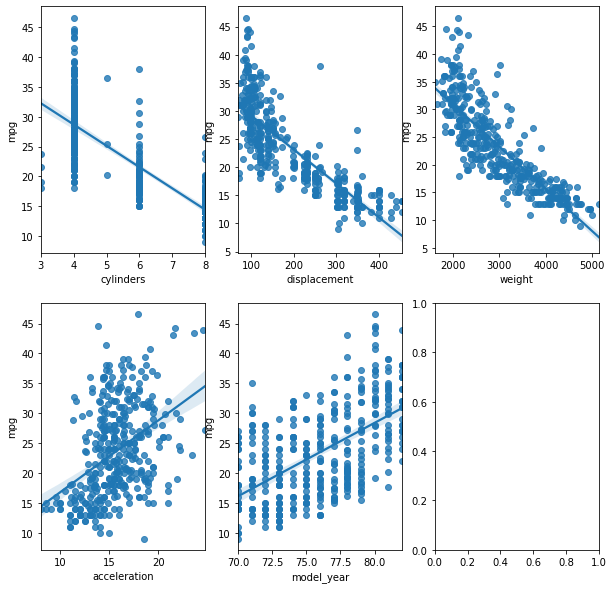

In [589]:
# 16x16 사이즈에 5행3열 subplots
fig, axs = plt.subplots(figsize=(10, 10), ncols=3, nrows=2)

x_features = ['cylinders', 'displacement', 'weight', 'acceleration', 'model_year']

for i, feature in enumerate(list(x_features)):
      row = int(i/3)
      col = i%3
      sns.regplot(x=feature, y='mpg', data=data_df, ax=axs[row][col])

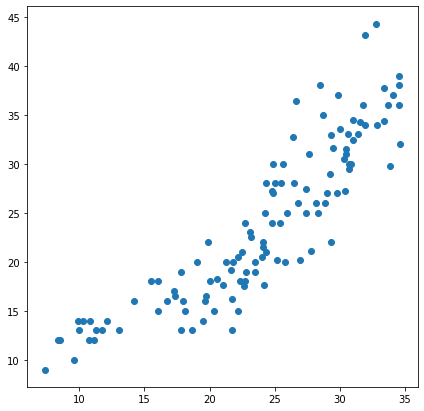

In [590]:
plt.figure(figsize=(7, 7))
plt.scatter(x=lr.predict(X_test), y=Y_test, )
plt.show()

## AI Service

In [596]:
# 8 307.0 3504 12.0 70
cylinders = input('cylinders >> ')
displacement = input('displacement >> ')
weight = input('weight >> ')
acceleration = input('acceleration >> ')
model_year = input('model year >> ')

cylinders >> 8
displacement >> 333
weight >> 3500
acceleration >> 13
model year >> 77


In [597]:
data = [cylinders, displacement, weight, acceleration, model_year]
use_data = [list(map(float, data))]
use_data[0][0] /= 100
use_data[0][1] /= 100
use_data[0][2] /= 100
use_data[0][3] /= 10
use_data

[[0.08, 3.33, 35.0, 1.3, 77.0]]

In [598]:
fuel_efficiency = lr.predict(use_data)
fuel_efficiency

array([21.25414531])

In [599]:
print(f"해당 차량의 연비는 {np.round(fuel_efficiency[-1], 1)}[mpg] 입니다.")

해당 차량의 연비는 21.3[mpg] 입니다.


# Further

In [600]:
data_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,cylinders_scaled,displacement_scaled,weight_scaled,acceleration_scaled,model_year_scaled
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.00000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531,0.054719,1.94412,29.775842,1.554133,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518,0.017058,1.04644,8.494026,0.275886,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,0.030000,0.68000,16.130000,0.800000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000,0.040000,1.05000,22.252500,1.377500,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000,0.040000,1.51000,28.035000,1.550000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000,0.080000,2.75750,36.147500,1.702500,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,0.080000,4.55000,51.400000,2.480000,82.000000


In [602]:
cylinders = int(np.random.rand() * 8 + 4) # 4 ~ 12
displacement = np.round(np.random.rand() * 400 + 50, 2) # 50 ~ 450
weight = np.round(np.random.rand() * 3500 + 1700, 2) # 1700 ~ 5200
acceleration = np.round(np.random.rand() * 20 + 4, 2) # 4 ~ 24
model_year = int(np.random.rand() * 29 + 70) # # 70 ~ 99

In [603]:
data = [cylinders, displacement, weight, acceleration, model_year]
use_data = [list(map(float, data))]
use_data[0][0] /= 100
use_data[0][1] /= 100
use_data[0][2] /= 100
use_data[0][3] /= 10
use_data

[[0.09, 3.9677999999999995, 32.661, 1.458, 71.0]]

In [604]:
fuel_efficiency = lr.predict(use_data)
fuel_efficiency

array([18.92261934])

In [605]:
print(f"해당 차량의 연비는 {np.round(fuel_efficiency[-1], 1)}[mpg] 입니다.")

해당 차량의 연비는 18.9[mpg] 입니다.
